In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
from PIL import Image
from IPython import display
import time

datapath = 'dataset/full_emoji.csv'
df = pd.read_csv(datapath)
df.head()

,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M..."
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//..."
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhEAAMAKIFAF5LAP/z...",NaN,"data:image/png;base64,R0lGODlhDAAMAIABAMxm////...",NaN


In [2]:
def toimg(img_url):
    request.urlretrieve(img_url, 'img')
    img = Image.open('img')
    return img

def imgtoarray(img_url):
    try:
        img = toimg(img_url)
        return np.asarray(img)
    except TypeError:
        return None

In [3]:
google_images = []
for url in df['Google'][:100].to_list():
    google_images.append(imgtoarray(url))
google_images = google_images

In [4]:
# google_images = google_images / 255.0
train_img = google_images[:80]
test_img = google_images[80:]

In [5]:
def make_batch(data):
    result = []
    for i in range(0, len(data), 10):
        result.append(np.asarray(data[i:i+11]))
    return np.asarray(result)
train_img = make_batch(train_img)/ 255.0
test_img = make_batch(test_img)/ 255.0

/var/folders/9_/rnj5svk11p1157tkdv28yb6r0000gn/T/ipykernel_74619/2392140627.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(result)


In [6]:
train_img[0].shape

(11, 72, 72, 4)

In [7]:
train_img[0].astype('float64')

array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
 

In [8]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [9]:
class CVAE(tf.keras.Model):
    """Convolutional variational autoencoder."""

    def __init__(self, latent_dim):
        super(CVAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(72, 72, 4)),
                tf.keras.layers.Conv2D(
                    filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Conv2D(
                    filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Flatten(),
                # No activation
                tf.keras.layers.Dense(latent_dim + latent_dim),
            ]
        )

        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
                tf.keras.layers.Dense(units=18*18*32, activation=tf.nn.relu),
                tf.keras.layers.Reshape(target_shape=(18, 18, 32)),
                tf.keras.layers.Conv2DTranspose(
                    filters=64, kernel_size=3, strides=2, padding='same',
                    activation='relu'),
                tf.keras.layers.Conv2DTranspose(
                    filters=32, kernel_size=3, strides=2, padding='same',
                    activation='relu'),
                # No activation
                tf.keras.layers.Conv2DTranspose(
                    filters=4, kernel_size=3, strides=1, padding='same'),
            ]
        )

    @tf.function
    def sample(self, eps=None):
        if eps is None:
            eps = tf.random.normal(shape=(100, self.latent_dim))
        return self.decode(eps, apply_sigmoid=True)

    def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean

    def decode(self, z, apply_sigmoid=False):
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

In [10]:
optimizer = tf.keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    x_logit = model.decode(z)
    x_logit = tf.cast(x_logit, dtype='float64')
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpx_z = tf.cast(logpx_z, dtype='float32')
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
    """Executes one training step and returns the loss.

    This function computes the loss and gradients, and uses the latter to
    update the model's parameters.
    """
    with tf.GradientTape() as tape:
        loss = compute_loss(model, x)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [11]:
epochs = 100
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 10

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

Metal device set to: Apple M1 Max


2022-02-14 19:01:33.449169: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-14 19:01:33.449318: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
def generate_and_save_images(model, epoch, test_sample):
    mean, logvar = model.encode(test_sample)
    z = model.reparameterize(mean, logvar)
    predictions = model.sample(z)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0])
        plt.axis('off')

    # tight_layout minimizes the overlap between 2 sub-plots
    plt.savefig('./vae_imgs/image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [13]:
train_size = 80
batch_size = 20
test_size = 20

In [14]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_img:
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]

Epoch: 100, Test set ELBO: -7512.421875, time elapse for current epoch: 0.11598896980285645


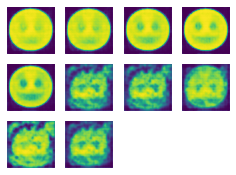

In [15]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
    start_time = time.time()
    for train_x in train_img:
        train_x = tf.cast(train_x, dtype='float64')
        train_step(model, train_x, optimizer)
    end_time = time.time()

    loss = tf.keras.metrics.Mean()
    for test_x in test_img:
        test_x = tf.cast(test_x, dtype='float64')
        loss(compute_loss(model, test_x))
    elbo = -loss.result()
    display.clear_output(wait=False)
    print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
    generate_and_save_images(model, epoch, test_sample)

In [18]:
train_vec = []
for train_x in train_img:
    mean, logvar = model.encode(train_x)
    z = model.reparameterize(mean, logvar)
    predictions = model.sample(z)
    train_vec.append(predictions)
train_vec

[<tf.Tensor: shape=(11, 72, 72, 4), dtype=float32, numpy=
 array([[[[1.34290993e-01, 1.19972751e-01, 1.32748663e-01,
           1.22101083e-01],
          [3.98189165e-02, 5.27003855e-02, 3.92825417e-02,
           4.48439531e-02],
          [3.67874205e-02, 4.53889295e-02, 4.10266519e-02,
           3.87334377e-02],
          ...,
          [1.54086296e-02, 2.50178091e-02, 1.47185400e-02,
           1.81068499e-02],
          [2.40126494e-02, 3.01328134e-02, 2.44005583e-02,
           2.51492076e-02],
          [7.26533011e-02, 1.37276068e-01, 6.28612414e-02,
           9.09755379e-02]],
 
         [[4.61582616e-02, 3.68328989e-02, 4.85848151e-02,
           2.34828815e-02],
          [5.80953667e-03, 6.21162774e-03, 4.38487250e-03,
           2.53074872e-03],
          [5.04404539e-03, 4.19760682e-03, 5.11769252e-03,
           2.20625964e-03],
          ...,
          [9.78603843e-04, 1.34913297e-03, 6.65263273e-04,
           4.03743907e-04],
          [2.02611089e-03, 1.57476671e-

In [19]:
len(train_vec)

8

In [21]:
train_vec[0][0]

<tf.Tensor: shape=(72, 72, 4), dtype=float32, numpy=
array([[[1.34290993e-01, 1.19972751e-01, 1.32748663e-01, 1.22101083e-01],
        [3.98189165e-02, 5.27003855e-02, 3.92825417e-02, 4.48439531e-02],
        [3.67874205e-02, 4.53889295e-02, 4.10266519e-02, 3.87334377e-02],
        ...,
        [1.54086296e-02, 2.50178091e-02, 1.47185400e-02, 1.81068499e-02],
        [2.40126494e-02, 3.01328134e-02, 2.44005583e-02, 2.51492076e-02],
        [7.26533011e-02, 1.37276068e-01, 6.28612414e-02, 9.09755379e-02]],

       [[4.61582616e-02, 3.68328989e-02, 4.85848151e-02, 2.34828815e-02],
        [5.80953667e-03, 6.21162774e-03, 4.38487250e-03, 2.53074872e-03],
        [5.04404539e-03, 4.19760682e-03, 5.11769252e-03, 2.20625964e-03],
        ...,
        [9.78603843e-04, 1.34913297e-03, 6.65263273e-04, 4.03743907e-04],
        [2.02611089e-03, 1.57476671e-03, 1.80395297e-03, 6.58876088e-04],
        [1.25250313e-02, 2.34685764e-02, 6.93117222e-03, 1.27974935e-02]],

       [[3.40862609e-02, 3.43